In [1]:
import numpy as np
from scipy.stats import norm, ncx2, chi2
import matplotlib.colors
import matplotlib.pyplot as plt

In [53]:
df = 2
max_llr = 10.

llr = np.linspace(0.,max_llr,200)

median_q = []
pvals = []
significances = []
naive = []

for x in llr:
    median_q.append(ncx2.ppf(0.5, df=df, nc=max(0.,x)))
    pvals.append(chi2.sf(median_q[-1], df=df))
    significances.append(norm.isf(pvals[-1] / 2))
    naive.append(norm.isf( chi2.sf(x + df - 1, df=df) /2))
    
median_q = np.asarray(median_q)
pvals = np.asarray(pvals)
significances = np.asarray(significances)
naive = np.asarray(naive)


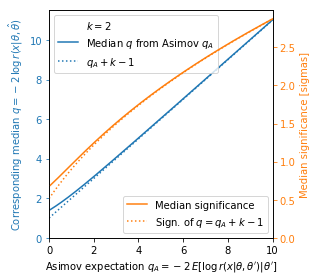

In [56]:
plt.figure(figsize=(4.5,4))

ax1 = plt.gca()
plt.plot([],[],ls='',label='$k=' + str(df) + '$')
plt.plot(llr, median_q, color='C0', label='Median $q$ from Asimov $q_A$')
plt.plot(llr, llr + df - 1, color='C0', ls='dotted', label='$q_A + k - 1$')
ax1.tick_params('y', colors='C0')
ax1.set_ylabel(r"Corresponding median $q = -2 \, \log \, r(x | \theta, \hat{\theta})$", color='C0')
plt.ylim(0.,None)
ax1.legend(loc='upper left')

#plt.plot(llr, pvals)
#ax1.set_yscale("log", nonposy='clip')
#ax1.tick_params('y', colors='C0')
#ax1.set_ylabel('Median $p$-value', color='C0')

plt.xlim(0.,max_llr)
ax1.set_xlabel(r"Asimov expectation $q_A = -2 \, E[ \log \, r(x | \theta, \theta') | \theta']$")

ax2 = ax1.twinx()
ax2.plot(llr, significances, color='C1', label = 'Median significance')
ax2.plot(llr, naive, color='C1', ls='dotted', label = 'Sign. of $q = q_A + k - 1}$')
plt.ylim(0.,None)
ax2.tick_params('y', colors='C1')
ax2.set_ylabel('Median significance [sigmas]', color='C1')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.savefig('../figures/neyman/asimov_p_values.pdf')

# Cross-check non-central chi-squared distribution with Wikipedia

/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:574: RuntimeWarning: divide by zero encountered in log
  res += np.log(ive(df2, xs*ns) / 2.0)


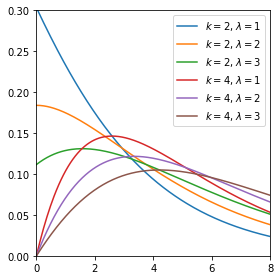

In [7]:
dofs = [2,2,2,4,4,4]
lambdas = [1,2,3,1,2,3]

plt.figure(figsize=(4,4))

for _dof, _lambda in zip(dofs, lambdas):
    _x = np.linspace(0.,8.,200)
    _y = ncx2.pdf(_x,_dof,_lambda)
    plt.plot(_x, _y,
             label='$k=' + str(_dof) + r'$, $\lambda =' + str(_lambda) + '$')
    
plt.xlim(0.,8.)
plt.ylim(0.,0.3)
plt.legend()
plt.tight_layout()
plt.savefig('../figures/debug/non-central_chi_squared_check.pdf')

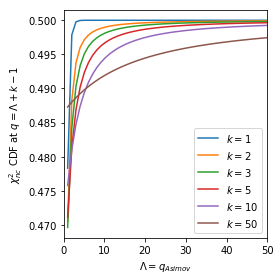

In [35]:
dofs = [1,2,3,5,10,50]
lambdas = np.linspace(0.,50,50)

plt.figure(figsize=(4,4))

for _dof in dofs:
    cdfs = []
    for _lambda in lambdas:
        cdfs.append(ncx2.cdf(_lambda + _dof - 1, _dof, _lambda))
                
    plt.plot(lambdas, cdfs,
             label='$k=' + str(_dof) + r'$')
    
plt.xlim(0.,50.)
#plt.ylim(0.,0.3)
plt.xlabel('$\Lambda = q_{Asimov}$')
plt.ylabel('$\chi^2_{nc}$ CDF at $q = \Lambda + k - 1$')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/debug/non-central_chi_squared_check2.pdf')

In [1]:
asimov_q = 20.
x = 30.

print(ncx2.pdf(x, df=1, nc=asimov_q))
print((
    0.5 / np.sqrt(2.*np.pi*x)
      *  ( np.exp(-0.5*(np.sqrt(x) + np.sqrt(asimov_q))**2)
         + np.exp(-0.5*(np.sqrt(x) - np.sqrt(asimov_q))**2))
))
      

NameError: name 'ncx2' is not defined